### Dataset
    https://www.kaggle.com/zalando-research/fashionmnist

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


### Loading the csv files as DataFrames

In [2]:
fashion_train_df = pd.read_csv("fashion-mnist_train.csv",sep = ',')
fashion_test_df= pd.read_csv("fashion-mnist_test.csv",sep = ',')

In [3]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Shape of DataFrames

In [4]:
fashion_train_df.shape

(60000, 785)

In [5]:
fashion_test_df.shape

(10000, 785)

In [6]:
training = np.array(fashion_train_df , dtype='float32')

In [7]:
testing = np.array(fashion_test_df , dtype='float32')

#### Plotting images from train and test set

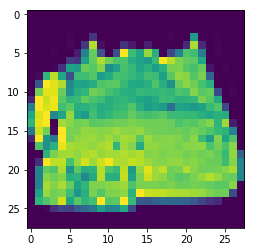

In [8]:
plt.imshow(training[100,1:].reshape(28,28))

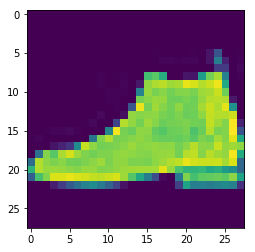

In [9]:
plt.imshow(testing[100,1:].reshape(28,28))

In [10]:
label = training[100,0]
label

8.0

In [11]:
X_train = training[:,1:]/255  #normalization
y_train = training[:,0]

In [12]:
X_test = testing[:,1:]/255  #normalization
y_test = testing[:,0]

In [13]:

X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state = 1)

In [32]:
X_train.shape[0]

48000

In [14]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

#### Shapes of datasets

In [15]:
X_train.shape

(48000, 28, 28, 1)

In [16]:
X_test.shape

(10000, 28, 28, 1)

In [17]:
X_validate.shape

(12000, 28, 28, 1)

#### Making the model

In [18]:
model = Sequential() 


In [19]:
model.add(Conv2D(64,(3,3),activation='relu',input_shape = (28,28,1)))

In [20]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units = 10 , activation = 'sigmoid'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                346144    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 347,114
Trainable params: 347,114
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [25]:
num_epochs = 100

In [26]:
model.fit(X_train,y_train,batch_size=512,epochs = num_epochs,verbose=1,
          validation_data = (X_validate,y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 49s 1ms/step - loss: 1.4977 - acc: 0.4712 - val_loss: 0.7309 - val_acc: 0.7838
Epoch 2/100
48000/48000 [==============================] - 49s 1ms/step - loss: 0.8881 - acc: 0.7115 - val_loss: 0.4735 - val_acc: 0.8272
Epoch 3/100
48000/48000 [==============================] - 51s 1ms/step - loss: 0.6742 - acc: 0.7681 - val_loss: 0.4309 - val_acc: 0.8484
Epoch 4/100
48000/48000 [==============================] - 49s 1ms/step - loss: 0.5866 - acc: 0.7955 - val_loss: 0.3889 - val_acc: 0.8579
Epoch 5/100
48000/48000 [==============================] - 44s 912us/step - loss: 0.5307 - acc: 0.8151 - val_loss: 0.3631 - val_acc: 0.8698
Epoch 6/100
48000/48000 [==============================] - 53s 1ms/step - loss: 0.4938 - acc: 0.8276 - val_loss: 0.3549 - val_acc: 0.8744
Epoch 7/100
48000/48000 [==============================] - 46s 960us/step - loss: 0.4708 - acc: 0.8359 - val_loss: 0.336

Epoch 59/100
48000/48000 [==============================] - 45s 940us/step - loss: 0.1816 - acc: 0.9290 - val_loss: 0.2915 - val_acc: 0.9110
Epoch 60/100
48000/48000 [==============================] - 44s 922us/step - loss: 0.1825 - acc: 0.9291 - val_loss: 0.2950 - val_acc: 0.9097
Epoch 61/100
48000/48000 [==============================] - 45s 940us/step - loss: 0.1803 - acc: 0.9293 - val_loss: 0.2922 - val_acc: 0.9120
Epoch 62/100
48000/48000 [==============================] - 44s 919us/step - loss: 0.1782 - acc: 0.9289 - val_loss: 0.2975 - val_acc: 0.9092
Epoch 63/100
48000/48000 [==============================] - 46s 949us/step - loss: 0.1748 - acc: 0.9307 - val_loss: 0.2964 - val_acc: 0.9121
Epoch 64/100
48000/48000 [==============================] - 47s 985us/step - loss: 0.1747 - acc: 0.9300 - val_loss: 0.2932 - val_acc: 0.9142
Epoch 65/100
48000/48000 [==============================] - 45s 933us/step - loss: 0.1711 - acc: 0.9323 - val_loss: 0.2909 - val_acc: 0.9140
Epoch 66/100


### Evaluating the model

In [27]:
evaluation = model.evaluate(X_test,y_test)
print("Loss : {} , Acurracy : {}".format(evaluation[0],evaluation[1]))

10000/10000 [==============================] - 5s 495us/step
Loss : 0.3139792321741581 , Acurracy : 0.9238


In [28]:
y_predict = model.predict_classes(X_test)

In [29]:
y_predict

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

#### Confusion matrix

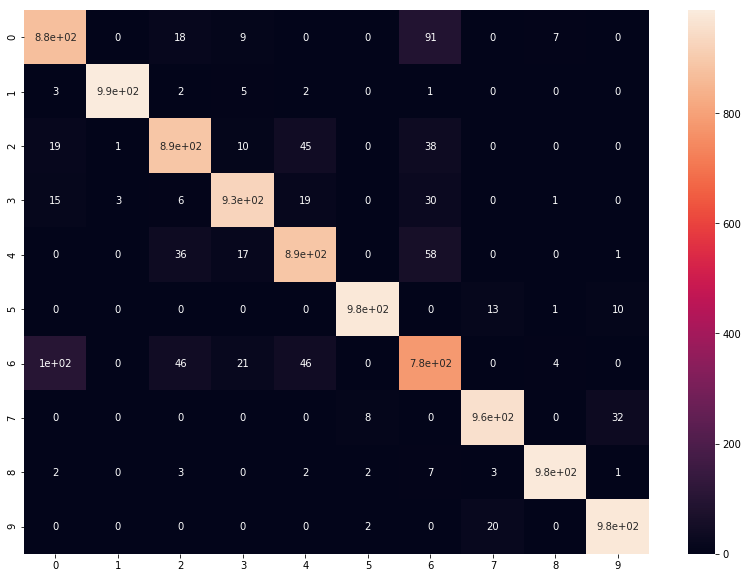

In [30]:
cm=confusion_matrix(y_test,y_predict)
plt.figure(figsize = (14,10))
sns.heatmap(cm,annot = True)

